In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import sys
sys.path.append("../week2")
from lr_utils import load_dataset


In [3]:
# train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

train_dataset = h5py.File("../week2/train_catvnoncat.h5")
train_set_x_orig = np.array(train_dataset["train_set_x"][:])
train_set_y = np.array(train_dataset["train_set_y"][:])


In [4]:
test_dataset = h5py.File("../week2/test_catvnoncat.h5")
test_set_x_orig = np.array(test_dataset["test_set_x"])
test_set_y = np.array(test_dataset["test_set_y"])

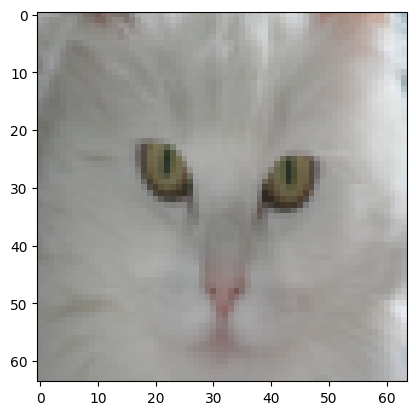

In [5]:
plt.imshow(train_set_x_orig[50])

In [6]:
train_set_x_orig.shape

(209, 64, 64, 3)

In [7]:
#flatten

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
print(train_set_x_flatten.shape)
print(test_set_x_flatten.shape)

(12288, 209)
(12288, 50)


In [8]:
#normalize

train_set_x_norm = train_set_x_flatten/255
test_set_x_norm = test_set_x_flatten/255
print(train_set_x_norm
     )

[[0.06666667 0.76862745 0.32156863 ... 0.56078431 0.08627451 0.03137255]
 [0.12156863 0.75294118 0.27843137 ... 0.60784314 0.09411765 0.10980392]
 [0.21960784 0.74509804 0.26666667 ... 0.64705882 0.09019608 0.20784314]
 ...
 [0.         0.32156863 0.54117647 ... 0.33333333 0.01568627 0.        ]
 [0.         0.31372549 0.55294118 ... 0.41960784 0.01960784 0.        ]
 [0.         0.31764706 0.55686275 ... 0.58431373 0.         0.        ]]


In [9]:
def init_params (X, hidden_layers):
    nx = X.shape[0]
    L = len(hidden_layers)
    
    params = {}
    for i in range(L):
        params[f'w{i+1}']= np.random.randn(hidden_layers[i], nx) * 0.01
        params[f'b{i+1}'] = np.zeros((hidden_layers[i],1))
        nx = hidden_layers[i]
    
    return params
    
    

In [10]:
h = init_params(train_set_x_norm, [3,4,5,1])

In [11]:
len(h)

8

In [12]:
def sigmoid (z):
    s = 1/(1+np.exp(-z))
    return s

In [13]:
h=np.array([[-9,3,4,5]])

In [14]:
h.shape

(1, 4)

In [15]:
sigmoid(h)

array([[1.23394576e-04, 9.52574127e-01, 9.82013790e-01, 9.93307149e-01]])

In [16]:
def relu (z):
    a = np.maximum(0,z)
    return a

In [17]:
relu(h)

array([[0, 3, 4, 5]])

In [25]:
def forward_propagation (params, X, Y):
    L = int(len(params)/2)
    print(L)
    m = X.shape[1]
    
    A_prev = X
    cache = {}
    for i in range(L-1):
        Z = np.dot(params[f'w{i+1}'],A_prev) + params[f'b{i+1}']
        A_curr = relu(Z)
        cache[f'Z{i+1}'] = Z
        cache[f'A{i+1}'] = A_curr
        A_prev = A_curr
        
    Z_final = np.dot(params[f'w{L}'],A_prev) + params[f'b{L}']
    A = sigmoid(Z_final)
    cache[f'Z{L}'] = Z_final
    cache[f'A{L}'] = A
    
    cost = (-1/m)*np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))
    cost = np.squeeze(cost)
    
    return A, cost, params, cache
    

In [26]:
a, cost, params, cache = forward_propagation(init_params(train_set_x_norm, [3,4,5,1]), train_set_x_norm, train_set_y)

4


In [28]:
def relu_prime (Z):
    

SyntaxError: incomplete input (3647185667.py, line 2)

In [34]:
h = np.array([[0,2,3]])

In [35]:
(h >= 0).astype(int)

array([[1, 1, 1]])

In [37]:
def backward_propagation (A, Y, params, cache):
    
    L = int(len(params)/2)
    
    m = X.shape[1]
    
    
    grads = {}
    dZ_last = A - Y
    grads[f'dw{L}'] = (1/m)*np.dot(dZ_last, cache[f'A{L-1}'].T)
    grads[f'db{L}'] = (1/m)*np.sum(dZ_last, keepdims=true, axis=1)
    dZ = dZ_last
    for i in reversed(range(2,L)):
        dZ = np.multipy((np.dot(params[f'w{i+1}'].T, dZ)), (cache[f'Z{i}'] >= 0).astype(int))
        grads[f'dw{i}'] = (1/m)*np.dot(dZ,cache[f'A{i-1}'].T)
        grads[f'db{i}'] = (1/m)*np.sum(dZ, keepdims=true, axis=1)
    
    dZ = np.multipy((np.dot(params[f'w2'].T, dZ)), (cache[f'Z1'] >= 0).astype(int))
    grads[f'dw1'] = (1/m)*np.dot(dZ,X.T)
    grads[f'db1'] = (1/m)*np.sum(dZ, keepdims=true, axis=1) 
    
    
    return grads
    
    

In [36]:
for i in range(1,8):
    print(i)

1
2
3
4
5
6
7


None


In [84]:
for i in reversed(range(7)):
    print(i)

6
5
4
3
2
1
0
